# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

09:13:43 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=649624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=965921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=298626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=617081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

09:13:44 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=908099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=451511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

09:13:46 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=515814;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=309004;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#89\89]8;;\

09:13:47 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=224034;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=710214;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#89\89]8;;\

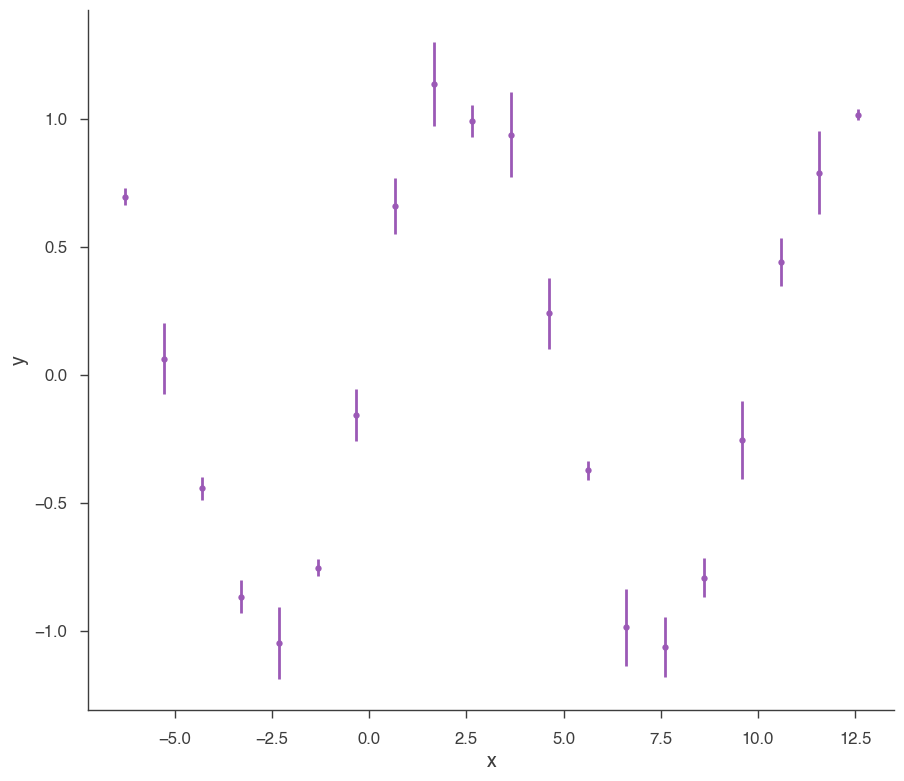

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=783145;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=739409;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

09:13:51 INFO      Mean acceptance fraction: 0.7132999999999999                                ]8;id=332620;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=99045;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

09:13:52 INFO      fit restored to maximum of posterior                                         ]8;id=286979;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=599819;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=913273;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=997638;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.017 -0.017 +0.015,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 +/- 0.06) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.374587
total,-6.374587


Values of statistical measures:

,statistical measures
AIC,17.455056
BIC,18.740638
DIC,16.783669
PDIC,2.015857


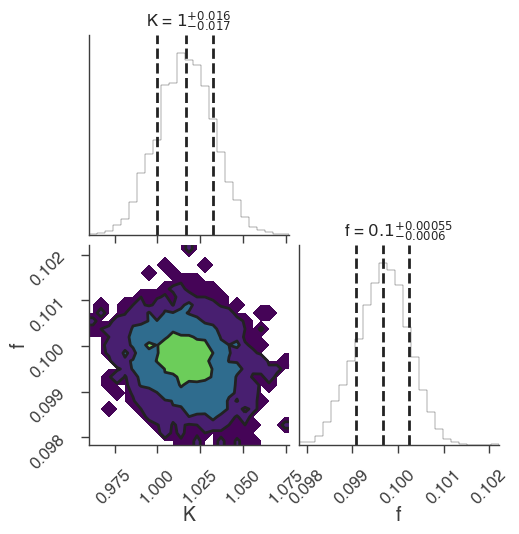

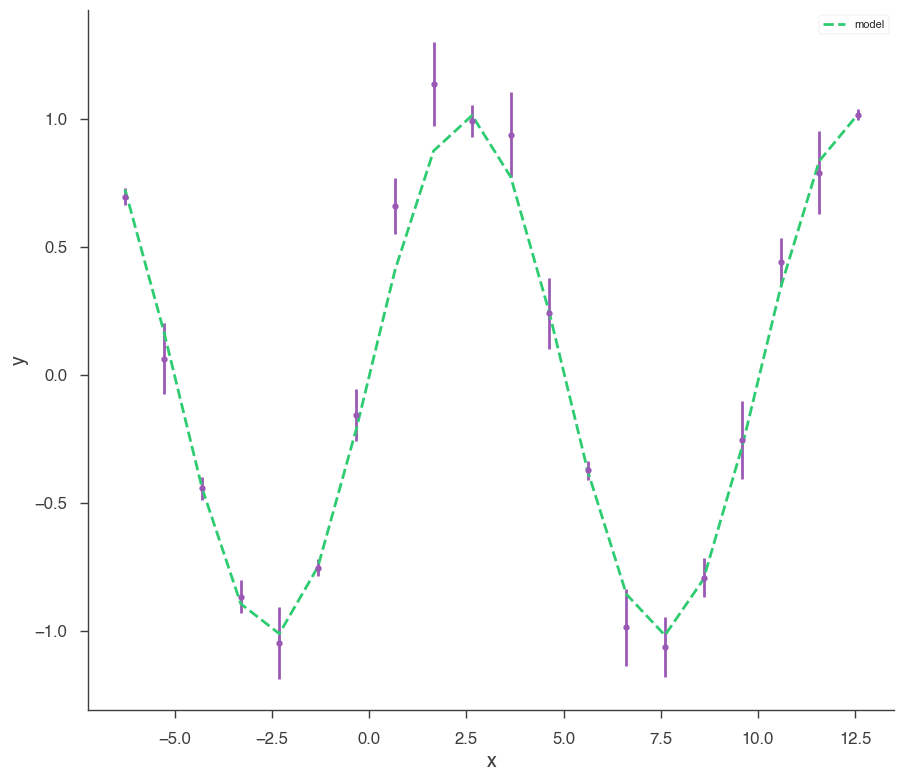

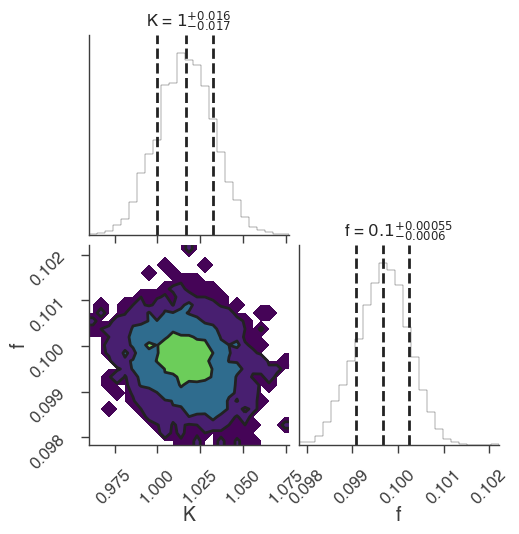

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

09:13:54 INFO      sampler set to multinest                                                ]8;id=567968;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=371657;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -15.556217730820263      +/-  0.14337989275708238     
 Total Likelihood Evaluations:         5434
 Sampling finished. Exiting MultiNest



09:13:55 INFO      fit restored to maximum of posterior                                         ]8;id=23887;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=577608;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=937151;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=886678;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.018 +/- 0.015,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 +/- 0.06) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.374951
total,-6.374951


Values of statistical measures:

,statistical measures
AIC,17.455785
BIC,18.741367
DIC,16.616489
PDIC,1.932295
log(Z),-6.755980


         INFO      deleting the chain directory chains                                     ]8;id=313008;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=697150;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

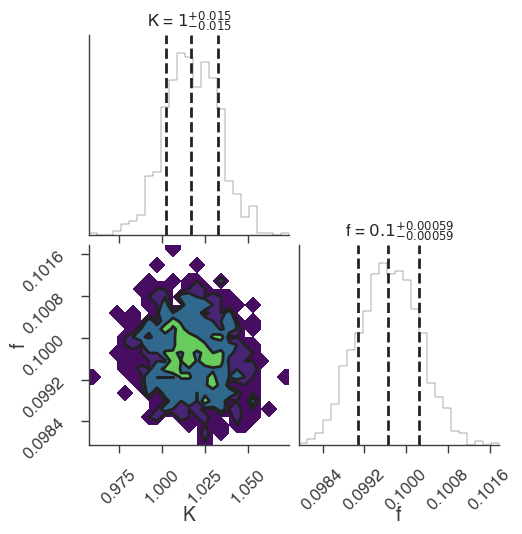

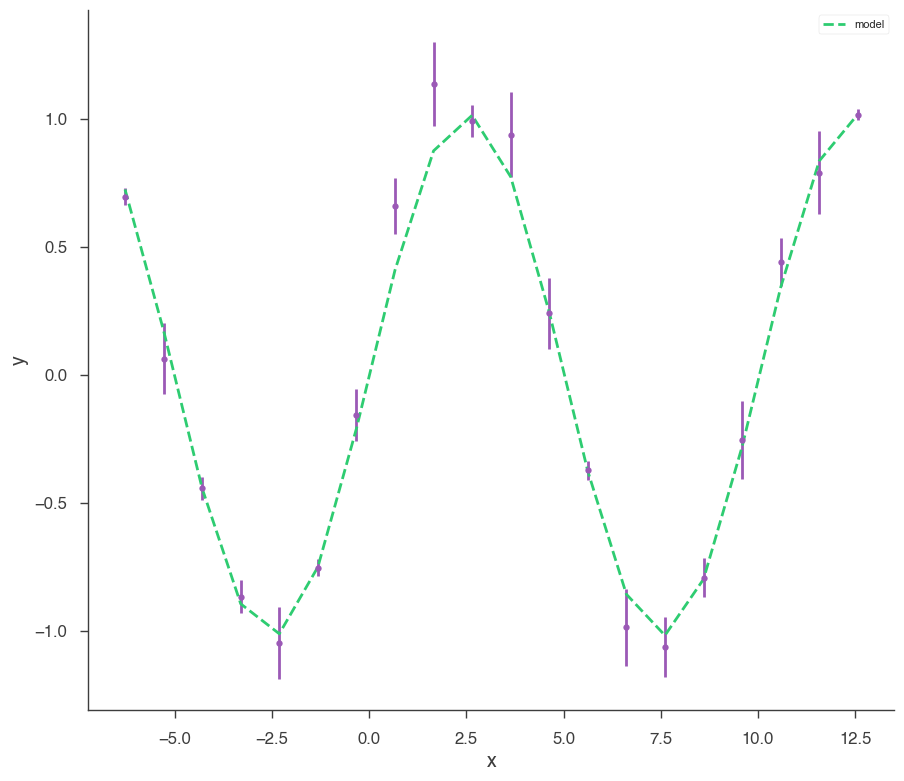

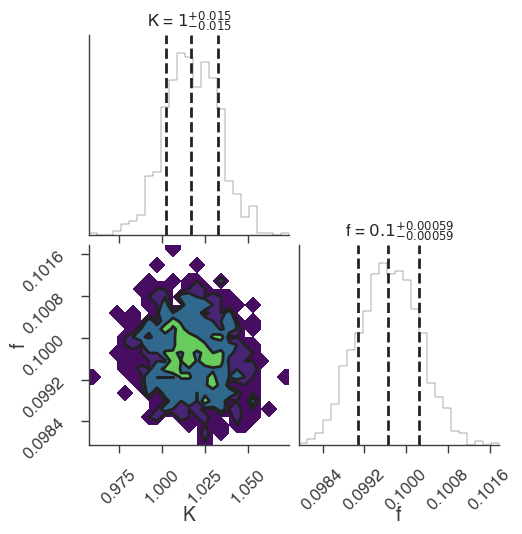

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

09:13:56 INFO      sampler set to dynesty_nested                                           ]8;id=731394;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=445705;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

118it [00:00, 1172.18it/s, bound: 0 | nc: 1 | ncall: 547 | eff(%): 21.572 | loglstar:   -inf < -4237.129 <    inf | logz: -4244.108 +/-  0.132 | dlogz: 4233.801 >  0.409]

236it [00:00, 1034.18it/s, bound: 0 | nc: 3 | ncall: 742 | eff(%): 31.806 | loglstar:   -inf < -3064.930 <    inf | logz: -3072.073 +/-  0.130 | dlogz: 3054.327 >  0.409]

341it [00:00, 953.95it/s, bound: 0 | nc: 1 | ncall: 962 | eff(%): 35.447 | loglstar:   -inf < -2446.363 <    inf | logz: -2453.037 +/-  0.124 | dlogz: 2433.252 >  0.409] 

438it [00:00, 870.55it/s, bound: 0 | nc: 5 | ncall: 1208 | eff(%): 36.258 | loglstar:   -inf < -2117.163 <    inf | logz: -2124.924 +/-  0.138 | dlogz: 2108.420 >  0.409]

527it [00:00, 699.84it/s, bound: 0 | nc: 16 | ncall: 1552 | eff(%): 33.956 | loglstar:   -inf < -1883.449 <    inf | logz: -1891.231 +/-  0.133 | dlogz: 1880.445 >  0.409]

602it [00:00, 597.98it/s, bound: 0 | nc: 3 | ncall: 1888 | eff(%): 31.886 | loglstar:   -inf < -1753.492 <    inf | logz: -1761.633 +/-  0.141 | dlogz: 1752.207 >  0.409] 

666it [00:00, 554.13it/s, bound: 0 | nc: 1 | ncall: 2184 | eff(%): 30.495 | loglstar:   -inf < -1667.261 <    inf | logz: -1674.569 +/-  0.132 | dlogz: 1662.615 >  0.409]

724it [00:01, 446.67it/s, bound: 0 | nc: 15 | ncall: 2604 | eff(%): 27.803 | loglstar:   -inf < -1613.772 <    inf | logz: -1621.319 +/-  0.129 | dlogz: 1609.009 >  0.409]

773it [00:01, 398.02it/s, bound: 0 | nc: 2 | ncall: 2949 | eff(%): 26.212 | loglstar:   -inf < -1579.610 <    inf | logz: -1586.996 +/-  0.126 | dlogz: 1574.256 >  0.409] 

816it [00:01, 377.67it/s, bound: 0 | nc: 2 | ncall: 3240 | eff(%): 25.185 | loglstar:   -inf < -1541.464 <    inf | logz: -1550.145 +/-  0.145 | dlogz: 1540.227 >  0.409]

856it [00:01, 341.81it/s, bound: 0 | nc: 4 | ncall: 3576 | eff(%): 23.937 | loglstar:   -inf < -1506.668 <    inf | logz: -1515.086 +/-  0.137 | dlogz: 1503.055 >  0.409]

892it [00:01, 307.10it/s, bound: 0 | nc: 6 | ncall: 3909 | eff(%): 22.819 | loglstar:   -inf < -1464.023 <    inf | logz: -1472.691 +/-  0.143 | dlogz: 1461.267 >  0.409]

924it [00:01, 273.37it/s, bound: 0 | nc: 4 | ncall: 4292 | eff(%): 21.528 | loglstar:   -inf < -1427.446 <    inf | logz: -1434.965 +/-  0.135 | dlogz: 1421.923 >  0.409]

952it [00:02, 250.56it/s, bound: 0 | nc: 1 | ncall: 4597 | eff(%): 20.709 | loglstar:   -inf < -1383.115 <    inf | logz: -1391.156 +/-  0.141 | dlogz: 1378.586 >  0.409]

978it [00:02, 235.78it/s, bound: 0 | nc: 64 | ncall: 4998 | eff(%): 19.568 | loglstar:   -inf < -1342.833 <    inf | logz: -1351.048 +/-  0.139 | dlogz: 1338.390 >  0.409]

1002it [00:02, 208.24it/s, bound: 0 | nc: 9 | ncall: 5353 | eff(%): 18.718 | loglstar:   -inf < -1307.869 <    inf | logz: -1316.182 +/-  0.136 | dlogz: 1303.190 >  0.409]

1023it [00:02, 200.45it/s, bound: 0 | nc: 10 | ncall: 5601 | eff(%): 18.265 | loglstar:   -inf < -1279.462 <    inf | logz: -1287.707 +/-  0.141 | dlogz: 1274.933 >  0.409]

1043it [00:02, 196.09it/s, bound: 0 | nc: 9 | ncall: 5832 | eff(%): 17.884 | loglstar:   -inf < -1257.174 <    inf | logz: -1265.335 +/-  0.138 | dlogz: 1252.275 >  0.409] 

1063it [00:02, 188.99it/s, bound: 0 | nc: 56 | ncall: 6051 | eff(%): 17.567 | loglstar:   -inf < -1241.026 <    inf | logz: -1249.667 +/-  0.137 | dlogz: 1236.566 >  0.409]

1082it [00:02, 166.69it/s, bound: 0 | nc: 23 | ncall: 6355 | eff(%): 17.026 | loglstar:   -inf < -1156.801 <    inf | logz: -1166.171 +/-  0.152 | dlogz: 1156.581 >  0.409]

1099it [00:03, 159.75it/s, bound: 0 | nc: 9 | ncall: 6615 | eff(%): 16.614 | loglstar:   -inf < -950.742 <    inf | logz: -960.171 +/-  0.153 | dlogz: 967.414 >  0.409]    

1116it [00:03, 152.94it/s, bound: 0 | nc: 27 | ncall: 6884 | eff(%): 16.212 | loglstar:   -inf < -893.944 <    inf | logz: -903.415 +/-  0.154 | dlogz: 899.308 >  0.409]

1132it [00:03, 150.00it/s, bound: 0 | nc: 5 | ncall: 7127 | eff(%): 15.883 | loglstar:   -inf < -823.152 <    inf | logz: -832.663 +/-  0.154 | dlogz: 833.110 >  0.409] 

1147it [00:03, 147.49it/s, bound: 0 | nc: 3 | ncall: 7331 | eff(%): 15.646 | loglstar:   -inf < -756.916 <    inf | logz: -766.394 +/-  0.152 | dlogz: 755.390 >  0.409]

1162it [00:03, 119.87it/s, bound: 0 | nc: 25 | ncall: 7694 | eff(%): 15.103 | loglstar:   -inf < -704.179 <    inf | logz: -712.760 +/-  0.143 | dlogz: 699.560 >  0.409]

1175it [00:03, 118.25it/s, bound: 0 | nc: 10 | ncall: 7943 | eff(%): 14.793 | loglstar:   -inf < -669.424 <    inf | logz: -678.589 +/-  0.145 | dlogz: 665.654 >  0.409]

1189it [00:03, 123.19it/s, bound: 0 | nc: 41 | ncall: 8158 | eff(%): 14.575 | loglstar:   -inf < -633.454 <    inf | logz: -642.810 +/-  0.148 | dlogz: 630.495 >  0.409]

1203it [00:03, 126.86it/s, bound: 0 | nc: 13 | ncall: 8376 | eff(%): 14.362 | loglstar:   -inf < -607.314 <    inf | logz: -616.562 +/-  0.146 | dlogz: 603.773 >  0.409]

1217it [00:04, 97.48it/s, bound: 0 | nc: 61 | ncall: 9007 | eff(%): 13.512 | loglstar:   -inf < -587.973 <    inf | logz: -596.337 +/-  0.138 | dlogz: 582.522 >  0.409] 

1228it [00:04, 95.86it/s, bound: 0 | nc: 8 | ncall: 9273 | eff(%): 13.243 | loglstar:   -inf < -575.468 <    inf | logz: -583.908 +/-  0.140 | dlogz: 570.177 >  0.409] 

1240it [00:04, 100.16it/s, bound: 0 | nc: 19 | ncall: 9493 | eff(%): 13.062 | loglstar:   -inf < -563.008 <    inf | logz: -571.490 +/-  0.141 | dlogz: 561.087 >  0.409]

1251it [00:04, 91.68it/s, bound: 0 | nc: 18 | ncall: 9799 | eff(%): 12.767 | loglstar:   -inf < -553.343 <    inf | logz: -561.442 +/-  0.136 | dlogz: 550.637 >  0.409] 

1261it [00:04, 88.26it/s, bound: 0 | nc: 60 | ncall: 10066 | eff(%): 12.527 | loglstar:   -inf < -535.942 <    inf | logz: -545.013 +/-  0.148 | dlogz: 535.137 >  0.409]

1271it [00:04, 84.49it/s, bound: 0 | nc: 6 | ncall: 10312 | eff(%): 12.325 | loglstar:   -inf < -517.755 <    inf | logz: -527.445 +/-  0.152 | dlogz: 518.611 >  0.409] 

1281it [00:04, 86.22it/s, bound: 0 | nc: 27 | ncall: 10558 | eff(%): 12.133 | loglstar:   -inf < -502.566 <    inf | logz: -512.289 +/-  0.151 | dlogz: 504.767 >  0.409]

1290it [00:04, 85.52it/s, bound: 0 | nc: 37 | ncall: 10777 | eff(%): 11.970 | loglstar:   -inf < -494.538 <    inf | logz: -503.357 +/-  0.146 | dlogz: 494.625 >  0.409]

1301it [00:05, 91.00it/s, bound: 0 | nc: 34 | ncall: 11005 | eff(%): 11.822 | loglstar:   -inf < -486.922 <    inf | logz: -496.270 +/-  0.143 | dlogz: 487.475 >  0.409]

1319it [00:05, 114.55it/s, bound: 0 | nc: 4 | ncall: 11219 | eff(%): 11.757 | loglstar:   -inf < -462.772 <    inf | logz: -471.867 +/-  0.145 | dlogz: 462.898 >  0.409]

1331it [00:05, 94.52it/s, bound: 0 | nc: 34 | ncall: 11619 | eff(%): 11.455 | loglstar:   -inf < -450.003 <    inf | logz: -458.272 +/-  0.137 | dlogz: 448.782 >  0.409]

1342it [00:05, 98.27it/s, bound: 0 | nc: 40 | ncall: 11836 | eff(%): 11.338 | loglstar:   -inf < -432.954 <    inf | logz: -441.829 +/-  0.145 | dlogz: 432.843 >  0.409]

1353it [00:05, 92.87it/s, bound: 0 | nc: 84 | ncall: 12127 | eff(%): 11.157 | loglstar:   -inf < -420.340 <    inf | logz: -429.569 +/-  0.147 | dlogz: 420.765 >  0.409]

1369it [00:05, 108.72it/s, bound: 0 | nc: 24 | ncall: 12352 | eff(%): 11.083 | loglstar:   -inf < -405.644 <    inf | logz: -414.683 +/-  0.145 | dlogz: 405.620 >  0.409]

1381it [00:05, 82.78it/s, bound: 0 | nc: 10 | ncall: 12862 | eff(%): 10.737 | loglstar:   -inf < -392.349 <    inf | logz: -401.471 +/-  0.143 | dlogz: 392.262 >  0.409] 

1391it [00:06, 82.34it/s, bound: 0 | nc: 28 | ncall: 13136 | eff(%): 10.589 | loglstar:   -inf < -383.719 <    inf | logz: -392.754 +/-  0.142 | dlogz: 383.408 >  0.409]

1403it [00:06, 85.28it/s, bound: 0 | nc: 84 | ncall: 13422 | eff(%): 10.453 | loglstar:   -inf < -371.556 <    inf | logz: -381.622 +/-  0.155 | dlogz: 374.087 >  0.409]

1415it [00:06, 90.16it/s, bound: 0 | nc: 59 | ncall: 13722 | eff(%): 10.312 | loglstar:   -inf < -359.693 <    inf | logz: -368.479 +/-  0.143 | dlogz: 358.944 >  0.409]

1425it [00:06, 77.53it/s, bound: 0 | nc: 23 | ncall: 14128 | eff(%): 10.086 | loglstar:   -inf < -349.100 <    inf | logz: -358.564 +/-  0.147 | dlogz: 349.444 >  0.409]

1434it [00:06, 54.38it/s, bound: 1 | nc: 1 | ncall: 14293 | eff(%): 10.033 | loglstar:   -inf < -338.264 <    inf | logz: -348.066 +/-  0.150 | dlogz: 339.375 >  0.409] 

1521it [00:06, 200.55it/s, bound: 1 | nc: 1 | ncall: 14430 | eff(%): 10.541 | loglstar:   -inf < -244.439 <    inf | logz: -253.937 +/-  0.147 | dlogz: 244.528 >  0.409]

1587it [00:06, 294.09it/s, bound: 1 | nc: 2 | ncall: 14574 | eff(%): 10.889 | loglstar:   -inf < -205.173 <    inf | logz: -213.813 +/-  0.141 | dlogz: 203.720 >  0.409]

1648it [00:07, 365.01it/s, bound: 1 | nc: 2 | ncall: 14726 | eff(%): 11.191 | loglstar:   -inf < -175.066 <    inf | logz: -184.974 +/-  0.146 | dlogz: 175.116 >  0.409]

1712it [00:07, 431.54it/s, bound: 1 | nc: 2 | ncall: 14884 | eff(%): 11.502 | loglstar:   -inf < -147.911 <    inf | logz: -157.283 +/-  0.144 | dlogz: 147.017 >  0.409]

1765it [00:07, 300.46it/s, bound: 2 | nc: 1 | ncall: 14952 | eff(%): 11.804 | loglstar:   -inf < -126.678 <    inf | logz: -135.890 +/-  0.145 | dlogz: 125.381 >  0.409]

1837it [00:07, 382.07it/s, bound: 2 | nc: 6 | ncall: 15088 | eff(%): 12.175 | loglstar:   -inf < -106.646 <    inf | logz: -115.696 +/-  0.142 | dlogz: 104.921 >  0.409]

1912it [00:07, 461.35it/s, bound: 2 | nc: 2 | ncall: 15246 | eff(%): 12.541 | loglstar:   -inf < -85.188 <    inf | logz: -94.184 +/-  0.143 | dlogz: 83.158 >  0.409]   

1978it [00:07, 506.31it/s, bound: 2 | nc: 3 | ncall: 15406 | eff(%): 12.839 | loglstar:   -inf < -73.097 <    inf | logz: -82.164 +/-  0.142 | dlogz: 70.961 >  0.409]

2038it [00:08, 379.78it/s, bound: 3 | nc: 2 | ncall: 15526 | eff(%): 13.126 | loglstar:   -inf < -62.877 <    inf | logz: -71.830 +/-  0.142 | dlogz: 60.436 >  0.409]

2139it [00:08, 508.56it/s, bound: 3 | nc: 2 | ncall: 15673 | eff(%): 13.648 | loglstar:   -inf < -47.591 <    inf | logz: -56.847 +/-  0.145 | dlogz: 45.209 >  0.409]

2225it [00:08, 587.07it/s, bound: 3 | nc: 2 | ncall: 15815 | eff(%): 14.069 | loglstar:   -inf < -39.228 <    inf | logz: -48.454 +/-  0.142 | dlogz: 36.573 >  0.409]

2296it [00:08, 585.67it/s, bound: 3 | nc: 1 | ncall: 16014 | eff(%): 14.337 | loglstar:   -inf < -32.614 <    inf | logz: -41.808 +/-  0.144 | dlogz: 29.736 >  0.409]

2363it [00:08, 410.61it/s, bound: 4 | nc: 1 | ncall: 16139 | eff(%): 14.642 | loglstar:   -inf < -27.756 <    inf | logz: -36.848 +/-  0.142 | dlogz: 24.641 >  0.409]

2458it [00:08, 514.34it/s, bound: 4 | nc: 2 | ncall: 16278 | eff(%): 15.100 | loglstar:   -inf < -22.806 <    inf | logz: -31.855 +/-  0.142 | dlogz: 19.396 >  0.409]

2533it [00:08, 563.37it/s, bound: 4 | nc: 4 | ncall: 16430 | eff(%): 15.417 | loglstar:   -inf < -20.208 <    inf | logz: -29.178 +/-  0.140 | dlogz: 16.521 >  0.409]

2602it [00:08, 582.59it/s, bound: 4 | nc: 2 | ncall: 16587 | eff(%): 15.687 | loglstar:   -inf < -17.906 <    inf | logz: -26.764 +/-  0.142 | dlogz: 13.927 >  0.409]

2669it [00:09, 427.34it/s, bound: 5 | nc: 1 | ncall: 16714 | eff(%): 15.969 | loglstar:   -inf < -16.129 <    inf | logz: -25.086 +/-  0.141 | dlogz: 12.088 >  0.409]

2764it [00:09, 530.78it/s, bound: 5 | nc: 2 | ncall: 16856 | eff(%): 16.398 | loglstar:   -inf < -13.994 <    inf | logz: -23.045 +/-  0.141 | dlogz:  9.808 >  0.409]

2846it [00:09, 594.80it/s, bound: 5 | nc: 1 | ncall: 16999 | eff(%): 16.742 | loglstar:   -inf < -12.501 <    inf | logz: -21.594 +/-  0.141 | dlogz:  8.151 >  0.409]

2921it [00:09, 632.11it/s, bound: 5 | nc: 1 | ncall: 17160 | eff(%): 17.022 | loglstar:   -inf < -11.404 <    inf | logz: -20.447 +/-  0.141 | dlogz:  6.814 >  0.409]

2994it [00:09, 451.02it/s, bound: 6 | nc: 2 | ncall: 17317 | eff(%): 17.289 | loglstar:   -inf < -10.596 <    inf | logz: -19.535 +/-  0.141 | dlogz:  5.718 >  0.409]

3126it [00:09, 624.62it/s, bound: 6 | nc: 1 | ncall: 17493 | eff(%): 17.870 | loglstar:   -inf < -9.591 <    inf | logz: -18.393 +/-  0.140 | dlogz:  4.253 >  0.409] 

3218it [00:09, 689.10it/s, bound: 6 | nc: 4 | ncall: 17640 | eff(%): 18.243 | loglstar:   -inf < -8.894 <    inf | logz: -17.799 +/-  0.140 | dlogz:  3.447 >  0.409]

3302it [00:10, 704.93it/s, bound: 6 | nc: 1 | ncall: 17815 | eff(%): 18.535 | loglstar:   -inf < -8.409 <    inf | logz: -17.339 +/-  0.140 | dlogz:  2.806 >  0.409]

3383it [00:10, 489.63it/s, bound: 7 | nc: 1 | ncall: 17954 | eff(%): 18.843 | loglstar:   -inf < -8.085 <    inf | logz: -16.984 +/-  0.140 | dlogz:  2.292 >  0.409]

3480it [00:10, 581.66it/s, bound: 7 | nc: 6 | ncall: 18098 | eff(%): 19.229 | loglstar:   -inf < -7.705 <    inf | logz: -16.641 +/-  0.141 | dlogz:  1.784 >  0.409]

3563it [00:10, 633.56it/s, bound: 7 | nc: 5 | ncall: 18250 | eff(%): 19.523 | loglstar:   -inf < -7.453 <    inf | logz: -16.401 +/-  0.141 | dlogz:  1.426 >  0.409]

3640it [00:10, 652.28it/s, bound: 7 | nc: 2 | ncall: 18421 | eff(%): 19.760 | loglstar:   -inf < -7.264 <    inf | logz: -16.216 +/-  0.141 | dlogz:  1.153 >  0.409]

3715it [00:10, 463.49it/s, bound: 8 | nc: 1 | ncall: 18543 | eff(%): 20.035 | loglstar:   -inf < -7.148 <    inf | logz: -16.068 +/-  0.141 | dlogz:  0.936 >  0.409]

3815it [00:11, 567.67it/s, bound: 8 | nc: 1 | ncall: 18680 | eff(%): 20.423 | loglstar:   -inf < -6.967 <    inf | logz: -15.912 +/-  0.141 | dlogz:  0.709 >  0.409]

3905it [00:11, 636.67it/s, bound: 8 | nc: 5 | ncall: 18828 | eff(%): 20.740 | loglstar:   -inf < -6.849 <    inf | logz: -15.800 +/-  0.141 | dlogz:  0.552 >  0.409]

3985it [00:11, 674.68it/s, bound: 8 | nc: 2 | ncall: 18978 | eff(%): 20.998 | loglstar:   -inf < -6.769 <    inf | logz: -15.718 +/-  0.141 | dlogz:  0.442 >  0.409]

4013it [00:11, 351.31it/s, +400 | bound: 8 | nc: 1 | ncall: 19430 | eff(%): 23.190 | loglstar:   -inf < -6.358 <    inf | logz: -15.343 +/-  0.141 | dlogz:  0.001 >  0.409]

09:14:08 INFO      fit restored to maximum of posterior                                         ]8;id=370216;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=752456;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=239236;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=509403;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.017 -0.015 +0.016,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 -0.07 +0.06) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.37511
total,-6.37511


Values of statistical measures:

,statistical measures
AIC,17.456102
BIC,18.741684
DIC,16.919608
PDIC,2.083807
log(Z),-6.663276


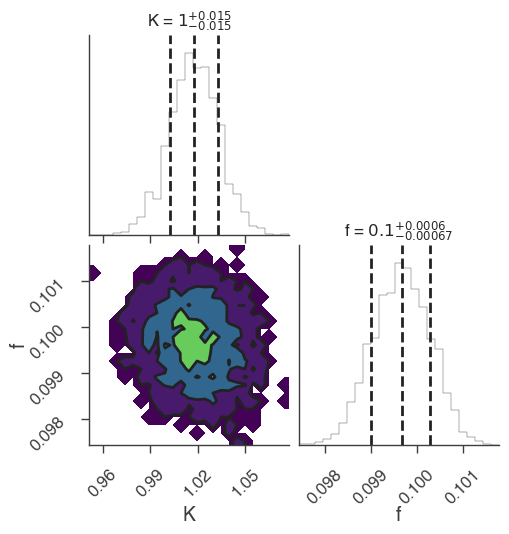

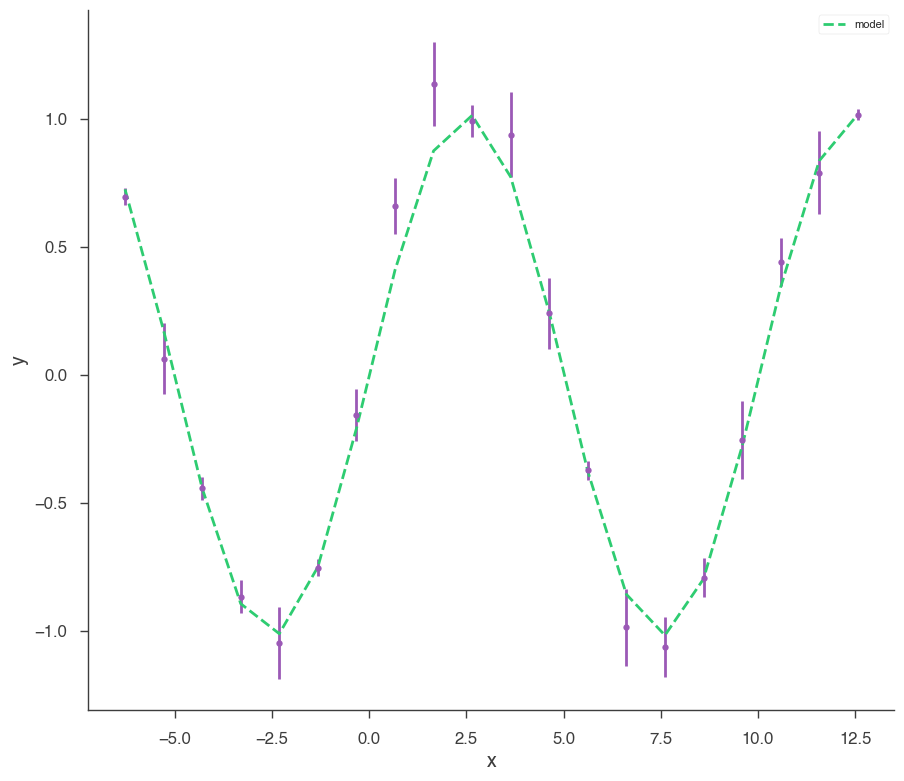

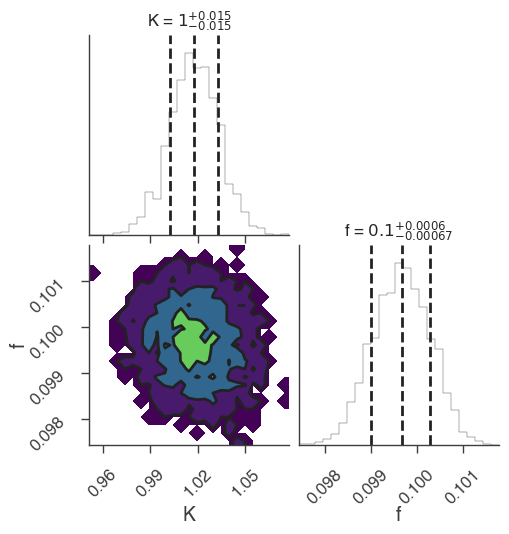

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

09:14:09 INFO      sampler set to dynesty_dynamic                                          ]8;id=989184;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=790604;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

48it [00:00, 478.27it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 49 | eff(%):  8.743 | loglstar:   -inf < -6656.813 <    inf | logz: -6663.817 +/-  0.118 | dlogz: 6674.202 >  0.010]

168it [00:00, 899.57it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 191 | eff(%): 24.313 | loglstar:   -inf < -4400.100 <    inf | logz: -4407.317 +/-  0.119 | dlogz: 4350.270 >  0.010]

271it [00:00, 955.53it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 342 | eff(%): 32.185 | loglstar:   -inf < -3459.489 <    inf | logz: -3466.939 +/-  0.122 | dlogz: 3422.663 >  0.010]

367it [00:00, 916.70it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 522 | eff(%): 35.910 | loglstar:   -inf < -2840.727 <    inf | logz: -2848.098 +/-  0.116 | dlogz: 2792.638 >  0.010]

459it [00:00, 879.34it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 709 | eff(%): 37.965 | loglstar:   -inf < -2429.634 <    inf | logz: -2437.304 +/-  0.121 | dlogz: 2403.164 >  0.010]

548it [00:00, 793.51it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 955 | eff(%): 37.663 | loglstar:   -inf < -2176.395 <    inf | logz: -2184.118 +/-  0.118 | dlogz: 2148.854 >  0.010]

629it [00:00, 675.07it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 1257 | eff(%): 35.800 | loglstar:   -inf < -2004.042 <    inf | logz: -2012.025 +/-  0.122 | dlogz: 1977.068 >  0.010]

700it [00:00, 656.26it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 1531 | eff(%): 34.466 | loglstar:   -inf < -1895.324 <    inf | logz: -1902.495 +/-  0.116 | dlogz: 1889.047 >  0.010]

768it [00:01, 575.24it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 1834 | eff(%): 32.905 | loglstar:   -inf < -1777.341 <    inf | logz: -1785.122 +/-  0.122 | dlogz: 1772.049 >  0.010]

828it [00:01, 544.05it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 2110 | eff(%): 31.724 | loglstar:   -inf < -1710.737 <    inf | logz: -1718.325 +/-  0.113 | dlogz: 1704.383 >  0.010]

884it [00:01, 509.52it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 2407 | eff(%): 30.409 | loglstar:   -inf < -1655.222 <    inf | logz: -1663.037 +/-  0.118 | dlogz: 1649.254 >  0.010]

936it [00:01, 430.53it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 2773 | eff(%): 28.598 | loglstar:   -inf < -1619.051 <    inf | logz: -1626.525 +/-  0.116 | dlogz: 1612.233 >  0.010]

982it [00:01, 376.65it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 3120 | eff(%): 27.127 | loglstar:   -inf < -1589.707 <    inf | logz: -1596.689 +/-  0.114 | dlogz: 1584.845 >  0.010]

1022it [00:01, 354.38it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 3391 | eff(%): 26.266 | loglstar:   -inf < -1561.994 <    inf | logz: -1570.569 +/-  0.123 | dlogz: 1559.756 >  0.010]

1059it [00:01, 320.65it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 3702 | eff(%): 25.202 | loglstar:   -inf < -1545.224 <    inf | logz: -1552.079 +/-  0.112 | dlogz: 1539.977 >  0.010]

1092it [00:02, 289.63it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 4008 | eff(%): 24.224 | loglstar:   -inf < -1525.138 <    inf | logz: -1532.844 +/-  0.118 | dlogz: 1521.077 >  0.010] 

1122it [00:02, 283.86it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 4239 | eff(%): 23.676 | loglstar:   -inf < -1502.834 <    inf | logz: -1511.024 +/-  0.120 | dlogz: 1499.454 >  0.010]

1151it [00:02, 259.57it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 4534 | eff(%): 22.865 | loglstar:   -inf < -1470.547 <    inf | logz: -1478.892 +/-  0.124 | dlogz: 1467.455 >  0.010]

1178it [00:02, 257.78it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 4752 | eff(%): 22.430 | loglstar:   -inf < -1445.428 <    inf | logz: -1453.925 +/-  0.121 | dlogz: 1442.304 >  0.010] 

1204it [00:02, 249.77it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 5009 | eff(%): 21.855 | loglstar:   -inf < -1422.635 <    inf | logz: -1430.245 +/-  0.120 | dlogz: 1418.083 >  0.010]

1229it [00:02, 228.61it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 5298 | eff(%): 21.197 | loglstar:   -inf < -1407.656 <    inf | logz: -1415.397 +/-  0.120 | dlogz: 1403.215 >  0.010]

1253it [00:02, 225.91it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 5523 | eff(%): 20.804 | loglstar:   -inf < -1367.830 <    inf | logz: -1376.212 +/-  0.123 | dlogz: 1364.372 >  0.010] 

1276it [00:02, 222.74it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 5803 | eff(%): 20.244 | loglstar:   -inf < -1329.906 <    inf | logz: -1338.506 +/-  0.127 | dlogz: 1329.595 >  0.010]

1299it [00:03, 216.75it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 6044 | eff(%): 19.850 | loglstar:   -inf < -1303.491 <    inf | logz: -1311.953 +/-  0.123 | dlogz: 1302.611 >  0.010]

1321it [00:03, 200.48it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 6319 | eff(%): 19.372 | loglstar:   -inf < -1286.276 <    inf | logz: -1293.632 +/-  0.118 | dlogz: 1283.803 >  0.010] 

1342it [00:03, 183.03it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 6627 | eff(%): 18.830 | loglstar:   -inf < -1263.650 <    inf | logz: -1272.518 +/-  0.130 | dlogz: 1263.720 >  0.010]

1361it [00:03, 182.42it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 6850 | eff(%): 18.517 | loglstar:   -inf < -1246.628 <    inf | logz: -1254.952 +/-  0.123 | dlogz: 1245.358 >  0.010] 

1380it [00:03, 173.29it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 7119 | eff(%): 18.113 | loglstar:   -inf < -1221.143 <    inf | logz: -1230.443 +/-  0.133 | dlogz: 1222.122 >  0.010]

1398it [00:03, 148.67it/s, batch: 0 | bound: 0 | nc: 77 | ncall: 7409 | eff(%): 17.676 | loglstar:   -inf < -1124.095 <    inf | logz: -1133.792 +/-  0.139 | dlogz: 1129.564 >  0.010]

1414it [00:03, 128.05it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 7683 | eff(%): 17.280 | loglstar:   -inf < -1054.310 <    inf | logz: -1064.037 +/-  0.139 | dlogz: 1059.664 >  0.010] 

1428it [00:04, 113.56it/s, batch: 0 | bound: 0 | nc: 38 | ncall: 7970 | eff(%): 16.860 | loglstar:   -inf < -1005.250 <    inf | logz: -1013.655 +/-  0.126 | dlogz: 1004.032 >  0.010]

1440it [00:04, 107.86it/s, batch: 0 | bound: 0 | nc: 41 | ncall: 8184 | eff(%): 16.582 | loglstar:   -inf < -954.207 <    inf | logz: -963.992 +/-  0.140 | dlogz: 963.472 >  0.010]   

1452it [00:04, 108.57it/s, batch: 0 | bound: 0 | nc: 48 | ncall: 8421 | eff(%): 16.276 | loglstar:   -inf < -884.031 <    inf | logz: -893.715 +/-  0.137 | dlogz: 886.126 >  0.010]

1464it [00:04, 99.50it/s, batch: 0 | bound: 0 | nc: 45 | ncall: 8758 | eff(%): 15.813 | loglstar:   -inf < -850.192 <    inf | logz: -859.818 +/-  0.135 | dlogz: 851.776 >  0.010] 

1475it [00:04, 100.48it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 8990 | eff(%): 15.543 | loglstar:   -inf < -812.912 <    inf | logz: -822.405 +/-  0.134 | dlogz: 813.795 >  0.010]

1488it [00:04, 107.38it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 9204 | eff(%): 15.334 | loglstar:   -inf < -779.501 <    inf | logz: -788.738 +/-  0.133 | dlogz: 779.739 >  0.010]

1505it [00:04, 123.02it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 9519 | eff(%): 15.021 | loglstar:   -inf < -728.430 <    inf | logz: -738.222 +/-  0.138 | dlogz: 730.607 >  0.010]

1518it [00:04, 117.75it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 9895 | eff(%): 14.603 | loglstar:   -inf < -700.431 <    inf | logz: -710.299 +/-  0.138 | dlogz: 702.788 >  0.010]

1531it [00:05, 118.48it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 10223 | eff(%): 14.278 | loglstar:   -inf < -676.329 <    inf | logz: -685.430 +/-  0.132 | dlogz: 676.114 >  0.010]

1553it [00:05, 144.68it/s, batch: 0 | bound: 0 | nc: 24 | ncall: 10533 | eff(%): 14.076 | loglstar:   -inf < -636.807 <    inf | logz: -646.718 +/-  0.138 | dlogz: 638.892 >  0.010]

1568it [00:05, 142.43it/s, batch: 0 | bound: 0 | nc: 21 | ncall: 10763 | eff(%): 13.922 | loglstar:   -inf < -595.519 <    inf | logz: -605.560 +/-  0.142 | dlogz: 606.660 >  0.010]

1583it [00:05, 137.17it/s, batch: 0 | bound: 0 | nc: 32 | ncall: 11069 | eff(%): 13.683 | loglstar:   -inf < -583.019 <    inf | logz: -591.539 +/-  0.127 | dlogz: 581.458 >  0.010]

1597it [00:05, 124.58it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 11367 | eff(%): 13.457 | loglstar:   -inf < -567.480 <    inf | logz: -576.566 +/-  0.130 | dlogz: 566.828 >  0.010] 

1610it [00:05, 99.74it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 11810 | eff(%): 13.079 | loglstar:   -inf < -538.649 <    inf | logz: -548.244 +/-  0.135 | dlogz: 539.159 >  0.010]

1621it [00:05, 90.17it/s, batch: 0 | bound: 0 | nc: 40 | ncall: 12153 | eff(%): 12.811 | loglstar:   -inf < -523.184 <    inf | logz: -532.397 +/-  0.129 | dlogz: 522.493 >  0.010]

1631it [00:05, 87.30it/s, batch: 0 | bound: 0 | nc: 61 | ncall: 12423 | eff(%): 12.621 | loglstar:   -inf < -508.565 <    inf | logz: -517.638 +/-  0.131 | dlogz: 507.777 >  0.010]

1641it [00:06, 80.59it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 12755 | eff(%): 12.380 | loglstar:   -inf < -494.188 <    inf | logz: -504.041 +/-  0.135 | dlogz: 495.078 >  0.010] 

1654it [00:06, 91.11it/s, batch: 0 | bound: 0 | nc: 35 | ncall: 12980 | eff(%): 12.270 | loglstar:   -inf < -484.872 <    inf | logz: -493.842 +/-  0.128 | dlogz: 483.762 >  0.010]

1668it [00:06, 96.00it/s, batch: 0 | bound: 0 | nc: 89 | ncall: 13252 | eff(%): 12.129 | loglstar:   -inf < -471.143 <    inf | logz: -480.141 +/-  0.127 | dlogz: 469.892 >  0.010]

1678it [00:06, 85.26it/s, batch: 0 | bound: 0 | nc: 29 | ncall: 13594 | eff(%): 11.906 | loglstar:   -inf < -462.181 <    inf | logz: -470.838 +/-  0.127 | dlogz: 460.472 >  0.010]

1687it [00:06, 80.76it/s, batch: 0 | bound: 0 | nc: 21 | ncall: 13923 | eff(%): 11.697 | loglstar:   -inf < -454.153 <    inf | logz: -462.871 +/-  0.129 | dlogz: 452.550 >  0.010]

1698it [00:06, 86.43it/s, batch: 0 | bound: 0 | nc: 31 | ncall: 14152 | eff(%): 11.589 | loglstar:   -inf < -436.850 <    inf | logz: -445.613 +/-  0.128 | dlogz: 435.248 >  0.010]

1707it [00:06, 81.41it/s, batch: 0 | bound: 0 | nc: 37 | ncall: 14424 | eff(%): 11.438 | loglstar:   -inf < -423.753 <    inf | logz: -434.035 +/-  0.142 | dlogz: 426.686 >  0.010]

1716it [00:07, 80.10it/s, batch: 0 | bound: 0 | nc: 67 | ncall: 14664 | eff(%): 11.316 | loglstar:   -inf < -416.134 <    inf | logz: -425.386 +/-  0.128 | dlogz: 415.134 >  0.010]

1725it [00:07, 74.20it/s, batch: 0 | bound: 0 | nc: 28 | ncall: 14925 | eff(%): 11.183 | loglstar:   -inf < -405.160 <    inf | logz: -414.955 +/-  0.136 | dlogz: 405.582 >  0.010]

1734it [00:07, 75.83it/s, batch: 0 | bound: 0 | nc: 48 | ncall: 15164 | eff(%): 11.070 | loglstar:   -inf < -393.402 <    inf | logz: -403.049 +/-  0.133 | dlogz: 393.172 >  0.010]

1742it [00:07, 73.72it/s, batch: 0 | bound: 0 | nc: 60 | ncall: 15468 | eff(%): 10.909 | loglstar:   -inf < -388.189 <    inf | logz: -397.484 +/-  0.129 | dlogz: 387.184 >  0.010]

1751it [00:07, 77.84it/s, batch: 0 | bound: 0 | nc: 82 | ncall: 15687 | eff(%): 10.817 | loglstar:   -inf < -381.230 <    inf | logz: -391.202 +/-  0.135 | dlogz: 381.683 >  0.010]

1759it [00:07, 69.55it/s, batch: 0 | bound: 0 | nc: 117 | ncall: 16015 | eff(%): 10.651 | loglstar:   -inf < -375.719 <    inf | logz: -385.390 +/-  0.132 | dlogz: 375.351 >  0.010]

1767it [00:07, 59.15it/s, batch: 0 | bound: 0 | nc: 60 | ncall: 16429 | eff(%): 10.438 | loglstar:   -inf < -370.411 <    inf | logz: -379.341 +/-  0.129 | dlogz: 368.827 >  0.010] 

1776it [00:07, 61.70it/s, batch: 0 | bound: 0 | nc: 126 | ncall: 16719 | eff(%): 10.314 | loglstar:   -inf < -361.874 <    inf | logz: -370.989 +/-  0.130 | dlogz: 360.615 >  0.010]

1788it [00:08, 72.93it/s, batch: 0 | bound: 0 | nc: 41 | ncall: 16961 | eff(%): 10.240 | loglstar:   -inf < -353.007 <    inf | logz: -362.124 +/-  0.128 | dlogz: 351.593 >  0.010] 

1796it [00:08, 61.75it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 17374 | eff(%): 10.048 | loglstar:   -inf < -346.923 <    inf | logz: -356.110 +/-  0.129 | dlogz: 345.584 >  0.010]

1803it [00:08, 41.88it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17586 | eff(%):  9.969 | loglstar:   -inf < -342.218 <    inf | logz: -351.736 +/-  0.130 | dlogz: 341.395 >  0.010] 

1898it [00:08, 200.01it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17718 | eff(%): 10.418 | loglstar:   -inf < -289.702 <    inf | logz: -298.301 +/-  0.126 | dlogz: 287.318 >  0.010]

1984it [00:08, 330.66it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17863 | eff(%): 10.804 | loglstar:   -inf < -245.831 <    inf | logz: -254.646 +/-  0.127 | dlogz: 243.522 >  0.010]

2060it [00:08, 424.55it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 18012 | eff(%): 11.128 | loglstar:   -inf < -205.256 <    inf | logz: -215.492 +/-  0.135 | dlogz: 204.867 >  0.010]

2129it [00:08, 487.57it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18160 | eff(%): 11.409 | loglstar:   -inf < -176.279 <    inf | logz: -185.528 +/-  0.131 | dlogz: 174.659 >  0.010]

2192it [00:09, 519.86it/s, batch: 0 | bound: 1 | nc: 11 | ncall: 18319 | eff(%): 11.648 | loglstar:   -inf < -156.917 <    inf | logz: -166.274 +/-  0.131 | dlogz: 155.255 >  0.010]

2253it [00:09, 365.90it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18411 | eff(%): 11.914 | loglstar:   -inf < -139.641 <    inf | logz: -148.844 +/-  0.129 | dlogz: 137.654 >  0.010] 

2342it [00:09, 471.96it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18552 | eff(%): 12.293 | loglstar:   -inf < -117.344 <    inf | logz: -126.897 +/-  0.130 | dlogz: 115.537 >  0.010]

2424it [00:09, 550.20it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18700 | eff(%): 12.625 | loglstar:   -inf < -97.506 <    inf | logz: -106.695 +/-  0.129 | dlogz: 95.086 >  0.010]  

2508it [00:09, 619.58it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18849 | eff(%): 12.962 | loglstar:   -inf < -84.008 <    inf | logz: -93.150 +/-  0.129 | dlogz: 81.449 >  0.010] 

2580it [00:09, 628.04it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 19027 | eff(%): 13.212 | loglstar:   -inf < -73.343 <    inf | logz: -82.503 +/-  0.129 | dlogz: 70.835 >  0.010]

2650it [00:10, 412.60it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19148 | eff(%): 13.487 | loglstar:   -inf < -64.346 <    inf | logz: -73.806 +/-  0.130 | dlogz: 62.146 >  0.010]

2744it [00:10, 513.67it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19291 | eff(%): 13.865 | loglstar:   -inf < -54.129 <    inf | logz: -63.752 +/-  0.130 | dlogz: 51.906 >  0.010]

2820it [00:10, 566.90it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19440 | eff(%): 14.142 | loglstar:   -inf < -47.139 <    inf | logz: -56.653 +/-  0.130 | dlogz: 44.618 >  0.010]

2890it [00:10, 589.98it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 19603 | eff(%): 14.376 | loglstar:   -inf < -42.021 <    inf | logz: -51.555 +/-  0.128 | dlogz: 39.371 >  0.010]

2959it [00:10, 580.97it/s, batch: 0 | bound: 3 | nc: 4 | ncall: 19798 | eff(%): 14.578 | loglstar:   -inf < -36.775 <    inf | logz: -46.423 +/-  0.131 | dlogz: 34.105 >  0.010]

3024it [00:10, 398.14it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19895 | eff(%): 14.827 | loglstar:   -inf < -33.247 <    inf | logz: -42.480 +/-  0.129 | dlogz: 29.996 >  0.010]

3123it [00:10, 511.66it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20031 | eff(%): 15.211 | loglstar:   -inf < -28.326 <    inf | logz: -37.783 +/-  0.130 | dlogz: 25.102 >  0.010]

3207it [00:11, 578.53it/s, batch: 0 | bound: 4 | nc: 7 | ncall: 20185 | eff(%): 15.504 | loglstar:   -inf < -24.130 <    inf | logz: -33.619 +/-  0.131 | dlogz: 20.764 >  0.010]

3279it [00:11, 608.72it/s, batch: 0 | bound: 4 | nc: 5 | ncall: 20345 | eff(%): 15.730 | loglstar:   -inf < -21.245 <    inf | logz: -30.637 +/-  0.130 | dlogz: 17.627 >  0.010]

3350it [00:11, 619.50it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20517 | eff(%): 15.939 | loglstar:   -inf < -19.556 <    inf | logz: -28.734 +/-  0.128 | dlogz: 15.574 >  0.010]

3419it [00:11, 421.63it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20637 | eff(%): 16.175 | loglstar:   -inf < -17.689 <    inf | logz: -27.025 +/-  0.129 | dlogz: 13.788 >  0.010]

3521it [00:11, 538.81it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 20777 | eff(%): 16.548 | loglstar:   -inf < -15.688 <    inf | logz: -24.971 +/-  0.128 | dlogz: 11.524 >  0.010]

3615it [00:11, 625.28it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 20923 | eff(%): 16.874 | loglstar:   -inf < -14.042 <    inf | logz: -23.342 +/-  0.129 | dlogz:  9.745 >  0.010]

3697it [00:11, 668.11it/s, batch: 0 | bound: 5 | nc: 6 | ncall: 21072 | eff(%): 17.138 | loglstar:   -inf < -12.922 <    inf | logz: -22.176 +/-  0.129 | dlogz:  8.413 >  0.010]

3783it [00:11, 714.74it/s, batch: 0 | bound: 5 | nc: 4 | ncall: 21262 | eff(%): 17.384 | loglstar:   -inf < -11.958 <    inf | logz: -21.167 +/-  0.128 | dlogz:  7.229 >  0.010]

3863it [00:12, 464.91it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21404 | eff(%): 17.636 | loglstar:   -inf < -11.218 <    inf | logz: -20.412 +/-  0.128 | dlogz:  6.314 >  0.010]

3955it [00:12, 552.21it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21543 | eff(%): 17.942 | loglstar:   -inf < -10.419 <    inf | logz: -19.642 +/-  0.128 | dlogz:  5.393 >  0.010]

4035it [00:12, 603.16it/s, batch: 0 | bound: 6 | nc: 4 | ncall: 21686 | eff(%): 18.187 | loglstar:   -inf < -9.782 <    inf | logz: -19.079 +/-  0.128 | dlogz:  4.675 >  0.010] 

4109it [00:12, 629.01it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21830 | eff(%): 18.401 | loglstar:   -inf < -9.326 <    inf | logz: -18.609 +/-  0.128 | dlogz:  4.064 >  0.010]

4182it [00:12, 651.74it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21989 | eff(%): 18.596 | loglstar:   -inf < -8.956 <    inf | logz: -18.216 +/-  0.128 | dlogz:  3.536 >  0.010]

4255it [00:13, 403.69it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22137 | eff(%): 18.797 | loglstar:   -inf < -8.635 <    inf | logz: -17.883 +/-  0.128 | dlogz:  3.074 >  0.010]

4360it [00:13, 521.67it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22272 | eff(%): 19.146 | loglstar:   -inf < -8.214 <    inf | logz: -17.474 +/-  0.128 | dlogz:  2.494 >  0.010]

4457it [00:13, 613.84it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22411 | eff(%): 19.454 | loglstar:   -inf < -7.936 <    inf | logz: -17.175 +/-  0.128 | dlogz:  2.051 >  0.010]

4544it [00:13, 671.19it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22556 | eff(%): 19.709 | loglstar:   -inf < -7.696 <    inf | logz: -16.951 +/-  0.128 | dlogz:  1.714 >  0.010]

4626it [00:13, 657.46it/s, batch: 0 | bound: 7 | nc: 6 | ncall: 22758 | eff(%): 19.890 | loglstar:   -inf < -7.473 <    inf | logz: -16.766 +/-  0.128 | dlogz:  1.438 >  0.010]

4702it [00:13, 421.96it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22888 | eff(%): 20.104 | loglstar:   -inf < -7.337 <    inf | logz: -16.619 +/-  0.128 | dlogz:  1.218 >  0.010]

4812it [00:13, 542.18it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23025 | eff(%): 20.455 | loglstar:   -inf < -7.129 <    inf | logz: -16.440 +/-  0.129 | dlogz:  0.954 >  0.010]

4899it [00:14, 608.57it/s, batch: 0 | bound: 8 | nc: 6 | ncall: 23171 | eff(%): 20.696 | loglstar:   -inf < -7.024 <    inf | logz: -16.323 +/-  0.129 | dlogz:  0.787 >  0.010]

4978it [00:14, 647.05it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23327 | eff(%): 20.892 | loglstar:   -inf < -6.927 <    inf | logz: -16.233 +/-  0.129 | dlogz:  0.659 >  0.010]

5057it [00:14, 680.85it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23479 | eff(%): 21.089 | loglstar:   -inf < -6.852 <    inf | logz: -16.156 +/-  0.129 | dlogz:  0.553 >  0.010]

5136it [00:14, 419.61it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 23633 | eff(%): 21.282 | loglstar:   -inf < -6.786 <    inf | logz: -16.091 +/-  0.129 | dlogz:  0.464 >  0.010]

5237it [00:14, 524.60it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23772 | eff(%): 21.576 | loglstar:   -inf < -6.707 <    inf | logz: -16.020 +/-  0.129 | dlogz:  0.371 >  0.010]

5318it [00:14, 581.70it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23916 | eff(%): 21.781 | loglstar:   -inf < -6.658 <    inf | logz: -15.973 +/-  0.129 | dlogz:  0.311 >  0.010]

5425it [00:14, 690.69it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24095 | eff(%): 22.057 | loglstar:   -inf < -6.599 <    inf | logz: -15.921 +/-  0.129 | dlogz:  0.247 >  0.010]

5510it [00:15, 692.61it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 24282 | eff(%): 22.234 | loglstar:   -inf < -6.560 <    inf | logz: -15.887 +/-  0.129 | dlogz:  0.205 >  0.010]

5591it [00:15, 480.41it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24409 | eff(%): 22.446 | loglstar:   -inf < -6.529 <    inf | logz: -15.859 +/-  0.129 | dlogz:  0.173 >  0.010]

5692it [00:15, 581.14it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24545 | eff(%): 22.727 | loglstar:   -inf < -6.503 <    inf | logz: -15.830 +/-  0.129 | dlogz:  0.140 >  0.010]

5792it [00:15, 669.85it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24685 | eff(%): 22.998 | loglstar:   -inf < -6.477 <    inf | logz: -15.806 +/-  0.129 | dlogz:  0.113 >  0.010]

5879it [00:15, 715.85it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24850 | eff(%): 23.191 | loglstar:   -inf < -6.457 <    inf | logz: -15.789 +/-  0.129 | dlogz:  0.094 >  0.010]

5963it [00:15, 727.01it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25028 | eff(%): 23.359 | loglstar:   -inf < -6.443 <    inf | logz: -15.776 +/-  0.129 | dlogz:  0.079 >  0.010]

6045it [00:16, 488.48it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25152 | eff(%): 23.565 | loglstar:   -inf < -6.431 <    inf | logz: -15.764 +/-  0.129 | dlogz:  0.067 >  0.010]

6152it [00:16, 600.43it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25287 | eff(%): 23.857 | loglstar:   -inf < -6.417 <    inf | logz: -15.752 +/-  0.129 | dlogz:  0.054 >  0.010]

6244it [00:16, 668.54it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25430 | eff(%): 24.080 | loglstar:   -inf < -6.407 <    inf | logz: -15.743 +/-  0.129 | dlogz:  0.045 >  0.010]

6326it [00:16, 702.11it/s, batch: 0 | bound: 11 | nc: 4 | ncall: 25583 | eff(%): 24.253 | loglstar:   -inf < -6.399 <    inf | logz: -15.737 +/-  0.129 | dlogz:  0.038 >  0.010]

6408it [00:16, 699.62it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25768 | eff(%): 24.395 | loglstar:   -inf < -6.393 <    inf | logz: -15.731 +/-  0.129 | dlogz:  0.032 >  0.010]

6486it [00:16, 431.53it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25899 | eff(%): 24.569 | loglstar:   -inf < -6.387 <    inf | logz: -15.726 +/-  0.129 | dlogz:  0.027 >  0.010]

6587it [00:16, 534.83it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26036 | eff(%): 24.823 | loglstar:   -inf < -6.382 <    inf | logz: -15.722 +/-  0.129 | dlogz:  0.022 >  0.010]

6661it [00:17, 576.43it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26158 | eff(%): 24.987 | loglstar:   -inf < -6.379 <    inf | logz: -15.719 +/-  0.129 | dlogz:  0.019 >  0.010]

6735it [00:17, 565.50it/s, batch: 0 | bound: 12 | nc: 3 | ncall: 26288 | eff(%): 25.142 | loglstar:   -inf < -6.376 <    inf | logz: -15.716 +/-  0.129 | dlogz:  0.017 >  0.010]

6803it [00:17, 564.27it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26443 | eff(%): 25.250 | loglstar:   -inf < -6.374 <    inf | logz: -15.714 +/-  0.129 | dlogz:  0.014 >  0.010]

6867it [00:17, 564.89it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 26573 | eff(%): 25.365 | loglstar:   -inf < -6.372 <    inf | logz: -15.712 +/-  0.129 | dlogz:  0.013 >  0.010]

6929it [00:17, 364.98it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26658 | eff(%): 25.514 | loglstar:   -inf < -6.370 <    inf | logz: -15.711 +/-  0.129 | dlogz:  0.011 >  0.010]

7215it [00:17, 820.30it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26949 | eff(%): 26.508 | loglstar:   -inf < -6.364 <    inf | logz: -15.705 +/-  0.129 | dlogz:  0.005 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7484it [00:18, 522.71it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 27218 | eff(%): 27.497 | loglstar: -8.297 < -6.821 < -6.878 | logz: -15.700 +/-  0.132 | stop:  1.347]           

7579it [00:19, 350.25it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27327 | eff(%): 27.124 | loglstar: -8.297 < -7.899 < -6.878 | logz: -15.700 +/-  0.132 | stop:  1.347]

7650it [00:19, 380.36it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 27434 | eff(%): 27.274 | loglstar: -8.297 < -7.679 < -6.878 | logz: -15.700 +/-  0.132 | stop:  1.347]

7720it [00:19, 414.60it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27536 | eff(%): 27.424 | loglstar: -8.297 < -7.499 < -6.878 | logz: -15.700 +/-  0.132 | stop:  1.347]

7789it [00:19, 448.74it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 27650 | eff(%): 27.557 | loglstar: -8.297 < -7.342 < -6.878 | logz: -15.700 +/-  0.132 | stop:  1.347]

7857it [00:19, 472.39it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27798 | eff(%): 27.653 | loglstar: -8.297 < -7.226 < -6.878 | logz: -15.700 +/-  0.132 | stop:  1.347]

7922it [00:19, 492.09it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 27950 | eff(%): 27.733 | loglstar: -8.297 < -7.126 < -6.878 | logz: -15.700 +/-  0.132 | stop:  1.347]

7985it [00:20, 354.63it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28029 | eff(%): 27.877 | loglstar: -8.297 < -7.036 < -6.878 | logz: -15.700 +/-  0.132 | stop:  1.347]

8058it [00:20, 416.82it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28116 | eff(%): 28.046 | loglstar: -8.297 < -6.942 < -6.878 | logz: -15.700 +/-  0.132 | stop:  1.347]

8274it [00:20, 751.44it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28392 | eff(%): 28.734 | loglstar: -8.297 < -6.701 < -6.878 | logz: -15.700 +/-  0.132 | stop:  1.347]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8603it [00:21, 474.42it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 28795 | eff(%): 29.877 | loglstar: -8.767 < -6.980 < -8.296 | logz: -15.672 +/-  0.109 | stop:  1.160]

8687it [00:21, 345.19it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28886 | eff(%): 29.539 | loglstar: -8.767 < -8.430 < -8.296 | logz: -15.672 +/-  0.109 | stop:  1.160]

8997it [00:21, 589.78it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29218 | eff(%): 30.554 | loglstar: -8.767 < -7.185 < -8.296 | logz: -15.672 +/-  0.109 | stop:  1.160]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9217it [00:22, 470.20it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29446 | eff(%): 31.301 | loglstar: -8.767 < -6.360 < -8.296 | logz: -15.672 +/-  0.109 | stop:  0.988]

9217it [00:22, 408.96it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29446 | eff(%): 31.301 | loglstar: -8.767 < -6.360 < -8.296 | logz: -15.672 +/-  0.109 | stop:  0.988]

09:14:32 INFO      fit restored to maximum of posterior                                         ]8;id=297384;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=555955;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=252998;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=455531;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.017 -0.015 +0.016,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 +/- 0.06) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.37461
total,-6.37461


Values of statistical measures:

,statistical measures
AIC,17.455102
BIC,18.740685
DIC,16.805456
PDIC,2.027328
log(Z),-6.805347


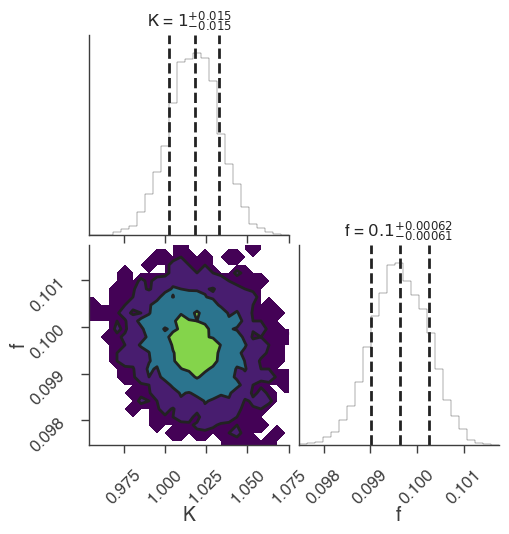

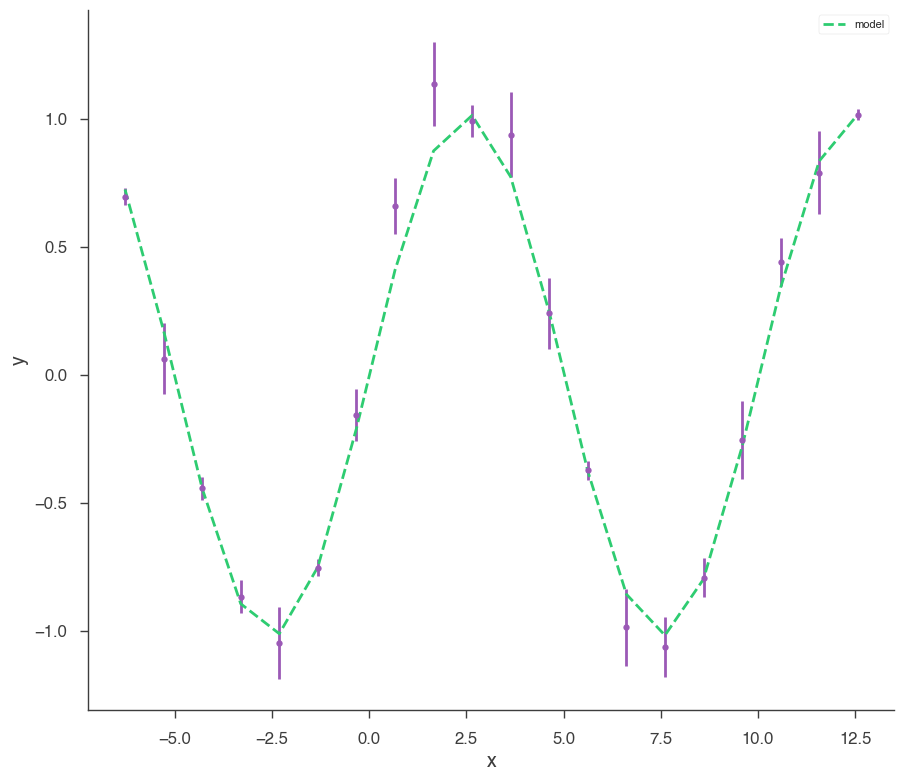

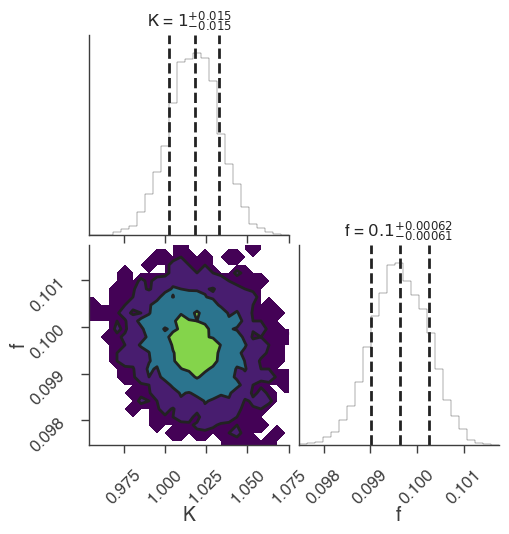

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

09:14:33 INFO      sampler set to zeus                                                     ]8;id=821203;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=216281;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   0%|          | 3/625 [00:00<00:22, 27.37it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:25, 24.75it/s]

Sampling progress :   1%|▏         | 9/625 [00:00<00:24, 24.90it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:26, 22.98it/s]

Sampling progress :   2%|▏         | 15/625 [00:00<00:26, 23.35it/s]

Sampling progress :   3%|▎         | 19/625 [00:00<00:23, 25.73it/s]

Sampling progress :   4%|▎         | 23/625 [00:00<00:21, 27.62it/s]

Sampling progress :   4%|▍         | 27/625 [00:01<00:20, 29.72it/s]

Sampling progress :   5%|▍         | 31/625 [00:01<00:19, 30.95it/s]

Sampling progress :   6%|▌         | 35/625 [00:01<00:19, 30.79it/s]

Sampling progress :   6%|▌         | 39/625 [00:01<00:18, 31.96it/s]

Sampling progress :   7%|▋         | 43/625 [00:01<00:18, 31.54it/s]

Sampling progress :   8%|▊         | 47/625 [00:01<00:18, 31.01it/s]

Sampling progress :   8%|▊         | 51/625 [00:01<00:18, 31.23it/s]

Sampling progress :   9%|▉         | 55/625 [00:01<00:17, 31.76it/s]

Sampling progress :   9%|▉         | 59/625 [00:02<00:17, 32.02it/s]

Sampling progress :  10%|█         | 63/625 [00:02<00:17, 32.67it/s]

Sampling progress :  11%|█         | 67/625 [00:02<00:16, 32.99it/s]

Sampling progress :  11%|█▏        | 71/625 [00:02<00:16, 33.22it/s]

Sampling progress :  12%|█▏        | 75/625 [00:02<00:16, 33.80it/s]

Sampling progress :  13%|█▎        | 79/625 [00:02<00:16, 32.55it/s]

Sampling progress :  13%|█▎        | 83/625 [00:02<00:16, 33.15it/s]

Sampling progress :  14%|█▍        | 87/625 [00:02<00:15, 34.28it/s]

Sampling progress :  15%|█▍        | 91/625 [00:02<00:16, 32.03it/s]

Sampling progress :  15%|█▌        | 95/625 [00:03<00:16, 32.60it/s]

Sampling progress :  16%|█▌        | 99/625 [00:03<00:15, 33.24it/s]

Sampling progress :  16%|█▋        | 103/625 [00:03<00:14, 34.85it/s]

Sampling progress :  17%|█▋        | 107/625 [00:03<00:15, 34.00it/s]

Sampling progress :  18%|█▊        | 111/625 [00:03<00:15, 33.90it/s]

Sampling progress :  18%|█▊        | 115/625 [00:03<00:15, 33.76it/s]

Sampling progress :  19%|█▉        | 119/625 [00:03<00:15, 31.63it/s]

Sampling progress :  20%|█▉        | 124/625 [00:03<00:15, 32.48it/s]

Sampling progress :  20%|██        | 128/625 [00:04<00:14, 34.22it/s]

Sampling progress :  21%|██        | 132/625 [00:04<00:14, 34.48it/s]

Sampling progress :  22%|██▏       | 136/625 [00:04<00:14, 34.45it/s]

Sampling progress :  22%|██▏       | 140/625 [00:04<00:13, 35.50it/s]

Sampling progress :  23%|██▎       | 144/625 [00:04<00:13, 36.30it/s]

Sampling progress :  24%|██▎       | 148/625 [00:04<00:13, 35.13it/s]

Sampling progress :  24%|██▍       | 152/625 [00:04<00:13, 34.16it/s]

Sampling progress :  25%|██▍       | 156/625 [00:04<00:13, 34.69it/s]

Sampling progress :  26%|██▌       | 160/625 [00:04<00:13, 35.45it/s]

Sampling progress :  26%|██▌       | 164/625 [00:05<00:13, 35.18it/s]

Sampling progress :  27%|██▋       | 168/625 [00:05<00:12, 35.19it/s]

Sampling progress :  28%|██▊       | 172/625 [00:05<00:12, 34.93it/s]

Sampling progress :  28%|██▊       | 176/625 [00:05<00:12, 35.84it/s]

Sampling progress :  29%|██▉       | 180/625 [00:05<00:14, 31.53it/s]

Sampling progress :  29%|██▉       | 184/625 [00:05<00:13, 32.43it/s]

Sampling progress :  30%|███       | 188/625 [00:05<00:13, 31.94it/s]

Sampling progress :  31%|███       | 192/625 [00:05<00:13, 32.06it/s]

Sampling progress :  31%|███▏      | 196/625 [00:06<00:13, 32.22it/s]

Sampling progress :  32%|███▏      | 200/625 [00:06<00:13, 31.87it/s]

Sampling progress :  33%|███▎      | 204/625 [00:06<00:12, 33.43it/s]

Sampling progress :  33%|███▎      | 208/625 [00:06<00:12, 34.16it/s]

Sampling progress :  34%|███▍      | 212/625 [00:06<00:12, 32.76it/s]

Sampling progress :  35%|███▍      | 216/625 [00:06<00:11, 34.20it/s]

Sampling progress :  35%|███▌      | 220/625 [00:06<00:11, 34.01it/s]

Sampling progress :  36%|███▌      | 224/625 [00:06<00:11, 34.62it/s]

Sampling progress :  36%|███▋      | 228/625 [00:07<00:11, 34.34it/s]

Sampling progress :  37%|███▋      | 232/625 [00:07<00:12, 31.05it/s]

Sampling progress :  38%|███▊      | 236/625 [00:07<00:12, 31.04it/s]

Sampling progress :  38%|███▊      | 240/625 [00:07<00:12, 31.37it/s]

Sampling progress :  39%|███▉      | 244/625 [00:07<00:12, 31.62it/s]

Sampling progress :  40%|███▉      | 248/625 [00:07<00:11, 32.33it/s]

Sampling progress :  40%|████      | 252/625 [00:07<00:11, 33.15it/s]

Sampling progress :  41%|████      | 256/625 [00:07<00:11, 32.51it/s]

Sampling progress :  42%|████▏     | 260/625 [00:07<00:10, 34.19it/s]

Sampling progress :  42%|████▏     | 264/625 [00:08<00:10, 34.99it/s]

Sampling progress :  43%|████▎     | 268/625 [00:08<00:10, 35.38it/s]

Sampling progress :  44%|████▎     | 272/625 [00:08<00:09, 36.34it/s]

Sampling progress :  44%|████▍     | 276/625 [00:08<00:09, 36.39it/s]

Sampling progress :  45%|████▍     | 280/625 [00:08<00:09, 35.26it/s]

Sampling progress :  45%|████▌     | 284/625 [00:08<00:09, 34.56it/s]

Sampling progress :  46%|████▌     | 288/625 [00:08<00:10, 33.28it/s]

Sampling progress :  47%|████▋     | 292/625 [00:08<00:10, 31.97it/s]

Sampling progress :  47%|████▋     | 296/625 [00:09<00:10, 32.59it/s]

Sampling progress :  48%|████▊     | 300/625 [00:09<00:10, 31.50it/s]

Sampling progress :  49%|████▊     | 304/625 [00:09<00:10, 31.75it/s]

Sampling progress :  49%|████▉     | 308/625 [00:09<00:10, 31.28it/s]

Sampling progress :  50%|████▉     | 312/625 [00:09<00:10, 30.40it/s]

Sampling progress :  51%|█████     | 316/625 [00:09<00:10, 29.62it/s]

Sampling progress :  51%|█████     | 320/625 [00:09<00:10, 30.43it/s]

Sampling progress :  52%|█████▏    | 324/625 [00:09<00:09, 30.96it/s]

Sampling progress :  52%|█████▏    | 328/625 [00:10<00:09, 31.72it/s]

Sampling progress :  53%|█████▎    | 332/625 [00:10<00:09, 32.34it/s]

Sampling progress :  54%|█████▍    | 336/625 [00:10<00:09, 31.85it/s]

Sampling progress :  54%|█████▍    | 340/625 [00:10<00:08, 33.32it/s]

Sampling progress :  55%|█████▌    | 344/625 [00:10<00:08, 32.38it/s]

Sampling progress :  56%|█████▌    | 348/625 [00:10<00:08, 32.41it/s]

Sampling progress :  56%|█████▋    | 352/625 [00:10<00:08, 33.31it/s]

Sampling progress :  57%|█████▋    | 356/625 [00:10<00:07, 33.97it/s]

Sampling progress :  58%|█████▊    | 360/625 [00:11<00:07, 33.60it/s]

Sampling progress :  58%|█████▊    | 364/625 [00:11<00:07, 33.46it/s]

Sampling progress :  59%|█████▉    | 368/625 [00:11<00:07, 33.52it/s]

Sampling progress :  60%|█████▉    | 372/625 [00:11<00:08, 31.31it/s]

Sampling progress :  60%|██████    | 376/625 [00:11<00:07, 31.26it/s]

Sampling progress :  61%|██████    | 380/625 [00:11<00:07, 31.41it/s]

Sampling progress :  61%|██████▏   | 384/625 [00:11<00:07, 32.15it/s]

Sampling progress :  62%|██████▏   | 388/625 [00:11<00:07, 32.81it/s]

Sampling progress :  63%|██████▎   | 392/625 [00:12<00:07, 31.87it/s]

Sampling progress :  64%|██████▎   | 397/625 [00:12<00:06, 34.08it/s]

Sampling progress :  64%|██████▍   | 401/625 [00:12<00:06, 33.91it/s]

Sampling progress :  65%|██████▍   | 405/625 [00:12<00:06, 35.24it/s]

Sampling progress :  65%|██████▌   | 409/625 [00:12<00:06, 33.98it/s]

Sampling progress :  66%|██████▌   | 413/625 [00:12<00:06, 32.70it/s]

Sampling progress :  67%|██████▋   | 417/625 [00:12<00:06, 30.04it/s]

Sampling progress :  67%|██████▋   | 421/625 [00:12<00:06, 30.80it/s]

Sampling progress :  68%|██████▊   | 425/625 [00:13<00:06, 32.29it/s]

Sampling progress :  69%|██████▊   | 429/625 [00:13<00:05, 33.52it/s]

Sampling progress :  69%|██████▉   | 433/625 [00:13<00:06, 31.92it/s]

Sampling progress :  70%|██████▉   | 437/625 [00:13<00:06, 30.71it/s]

Sampling progress :  71%|███████   | 441/625 [00:13<00:05, 30.95it/s]

Sampling progress :  71%|███████   | 445/625 [00:13<00:05, 32.13it/s]

Sampling progress :  72%|███████▏  | 449/625 [00:13<00:05, 32.71it/s]

Sampling progress :  72%|███████▏  | 453/625 [00:13<00:05, 33.19it/s]

Sampling progress :  73%|███████▎  | 457/625 [00:14<00:05, 33.03it/s]

Sampling progress :  74%|███████▍  | 461/625 [00:14<00:05, 32.02it/s]

Sampling progress :  74%|███████▍  | 465/625 [00:14<00:04, 32.84it/s]

Sampling progress :  75%|███████▌  | 469/625 [00:14<00:04, 34.66it/s]

Sampling progress :  76%|███████▌  | 473/625 [00:14<00:04, 35.66it/s]

Sampling progress :  76%|███████▋  | 477/625 [00:14<00:04, 35.68it/s]

Sampling progress :  77%|███████▋  | 481/625 [00:14<00:04, 34.82it/s]

Sampling progress :  78%|███████▊  | 485/625 [00:14<00:04, 34.72it/s]

Sampling progress :  78%|███████▊  | 489/625 [00:14<00:03, 34.43it/s]

Sampling progress :  79%|███████▉  | 493/625 [00:15<00:03, 34.69it/s]

Sampling progress :  80%|███████▉  | 497/625 [00:15<00:03, 35.93it/s]

Sampling progress :  80%|████████  | 501/625 [00:15<00:03, 35.78it/s]

Sampling progress :  81%|████████  | 505/625 [00:15<00:03, 35.77it/s]

Sampling progress :  81%|████████▏ | 509/625 [00:15<00:03, 34.60it/s]

Sampling progress :  82%|████████▏ | 513/625 [00:15<00:03, 31.93it/s]

Sampling progress :  83%|████████▎ | 517/625 [00:15<00:03, 32.40it/s]

Sampling progress :  83%|████████▎ | 521/625 [00:15<00:03, 32.98it/s]

Sampling progress :  84%|████████▍ | 525/625 [00:16<00:03, 33.18it/s]

Sampling progress :  85%|████████▍ | 529/625 [00:16<00:02, 33.45it/s]

Sampling progress :  85%|████████▌ | 533/625 [00:16<00:02, 31.77it/s]

Sampling progress :  86%|████████▌ | 537/625 [00:16<00:02, 32.81it/s]

Sampling progress :  87%|████████▋ | 541/625 [00:16<00:02, 32.80it/s]

Sampling progress :  87%|████████▋ | 545/625 [00:16<00:02, 33.12it/s]

Sampling progress :  88%|████████▊ | 549/625 [00:16<00:02, 33.43it/s]

Sampling progress :  88%|████████▊ | 553/625 [00:16<00:02, 33.22it/s]

Sampling progress :  89%|████████▉ | 557/625 [00:17<00:02, 33.75it/s]

Sampling progress :  90%|████████▉ | 561/625 [00:17<00:01, 34.31it/s]

Sampling progress :  90%|█████████ | 565/625 [00:17<00:01, 33.59it/s]

Sampling progress :  91%|█████████ | 569/625 [00:17<00:01, 33.32it/s]

Sampling progress :  92%|█████████▏| 573/625 [00:17<00:01, 34.67it/s]

Sampling progress :  92%|█████████▏| 578/625 [00:17<00:01, 36.33it/s]

Sampling progress :  93%|█████████▎| 582/625 [00:17<00:01, 36.28it/s]

Sampling progress :  94%|█████████▍| 586/625 [00:17<00:01, 35.86it/s]

Sampling progress :  94%|█████████▍| 590/625 [00:17<00:00, 36.41it/s]

Sampling progress :  95%|█████████▌| 594/625 [00:18<00:00, 35.14it/s]

Sampling progress :  96%|█████████▌| 598/625 [00:18<00:00, 34.74it/s]

Sampling progress :  96%|█████████▋| 602/625 [00:18<00:00, 34.92it/s]

Sampling progress :  97%|█████████▋| 606/625 [00:18<00:00, 33.43it/s]

Sampling progress :  98%|█████████▊| 610/625 [00:18<00:00, 34.07it/s]

Sampling progress :  98%|█████████▊| 614/625 [00:18<00:00, 32.83it/s]

Sampling progress :  99%|█████████▉| 618/625 [00:18<00:00, 31.92it/s]

Sampling progress : 100%|█████████▉| 622/625 [00:18<00:00, 31.44it/s]

Sampling progress : 100%|██████████| 625/625 [00:19<00:00, 32.83it/s]

09:14:53 INFO      fit restored to maximum of posterior                                         ]8;id=570216;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=911756;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=754152;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=828278;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 14


Scale Factor: 0.85725


Mean Integrated Autocorrelation Time: 2.78


Effective Sample Size: 4503.28


Number of Log Probability Evaluations: 68474


Effective Samples per Log Probability Evaluation: 0.065766


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.017 -0.015 +0.016,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 +/- 0.06) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.374732
total,-6.374732


Values of statistical measures:

,statistical measures
AIC,17.455347
BIC,18.740929
DIC,16.808690
PDIC,2.028144


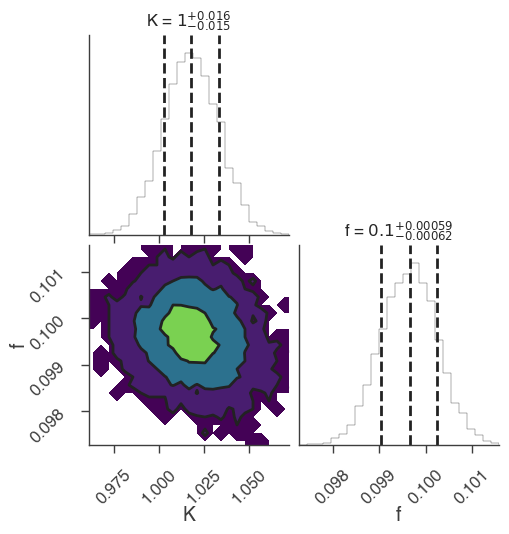

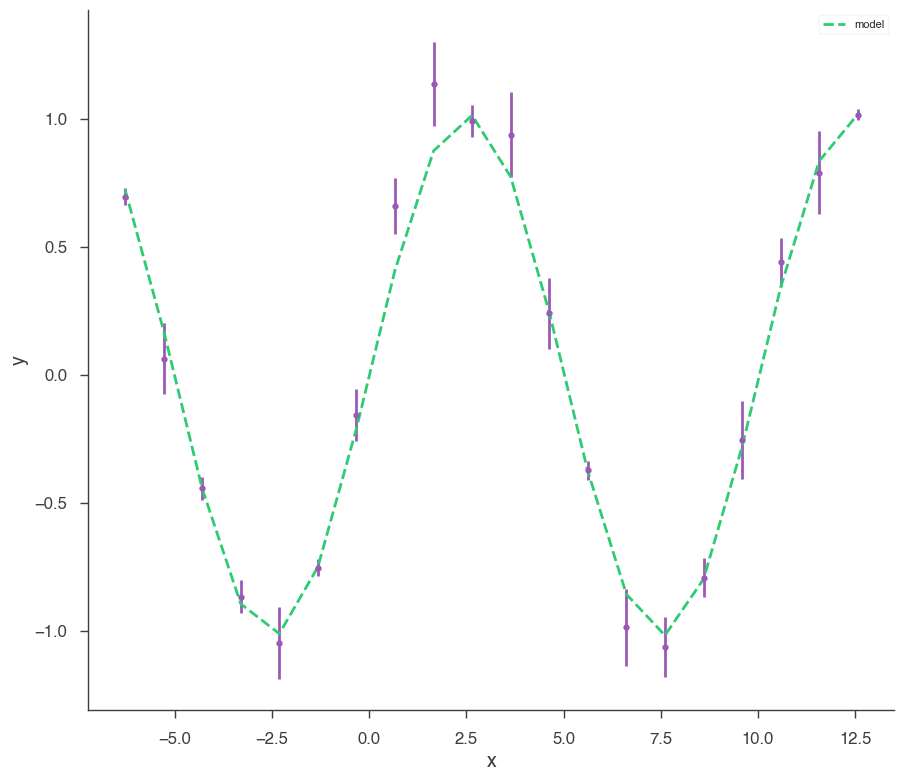

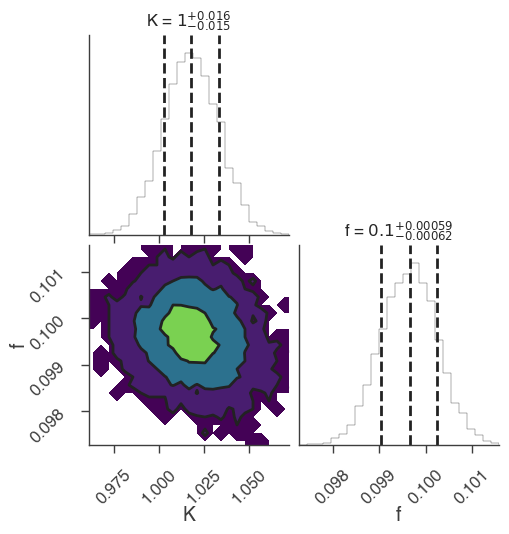

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

09:14:54 INFO      sampler set to ultranest                                                ]8;id=853574;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=549292;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6  


[ultranest] Likelihood function evaluations: 8634


[ultranest]   logZ = -15.59 +- 0.1158


[ultranest] Effective samples strategy satisfied (ESS = 980.7, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.12 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


09:15:06 INFO      fit restored to maximum of posterior                                         ]8;id=380310;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=332440;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=483668;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=416440;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.017 -0.015 +0.017,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 -0.05 +0.06) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.378834
total,-6.378834


Values of statistical measures:

,statistical measures
AIC,17.463550
BIC,18.749132
DIC,16.846376
PDIC,2.047987
log(Z),-6.761838


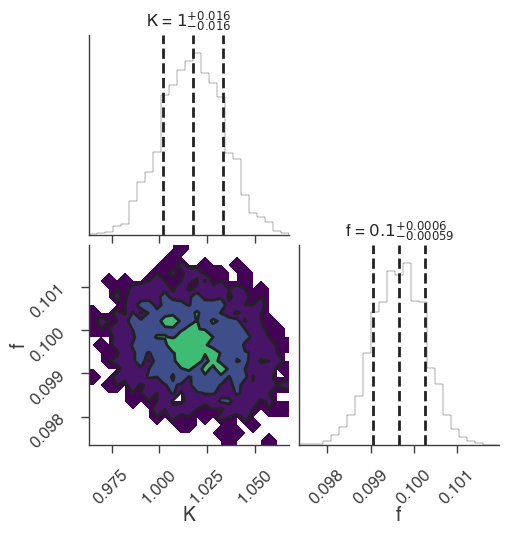

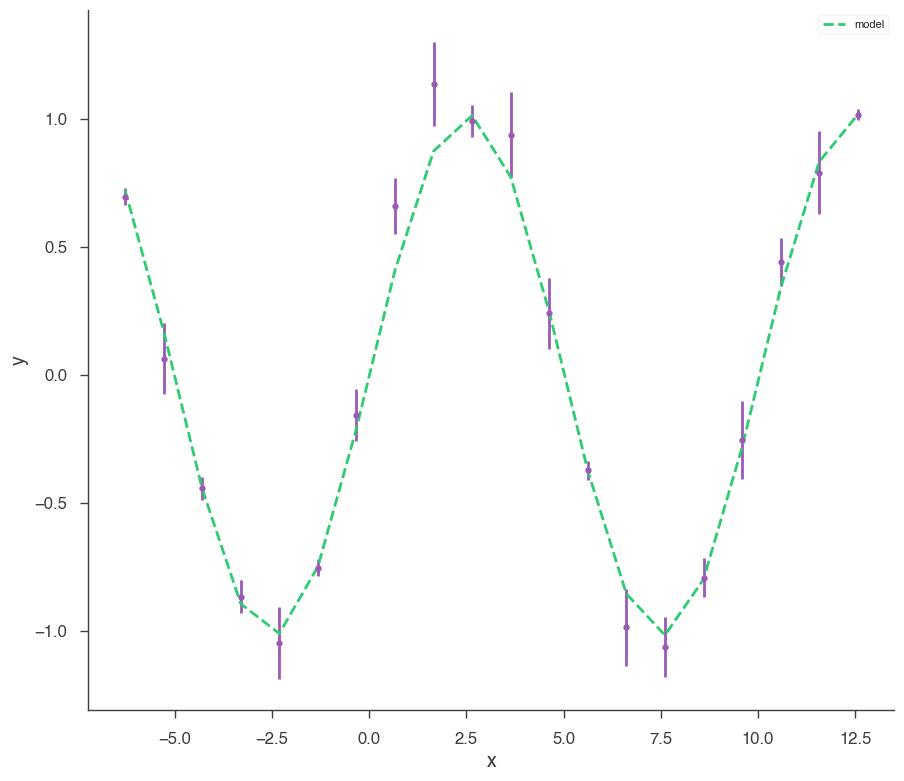

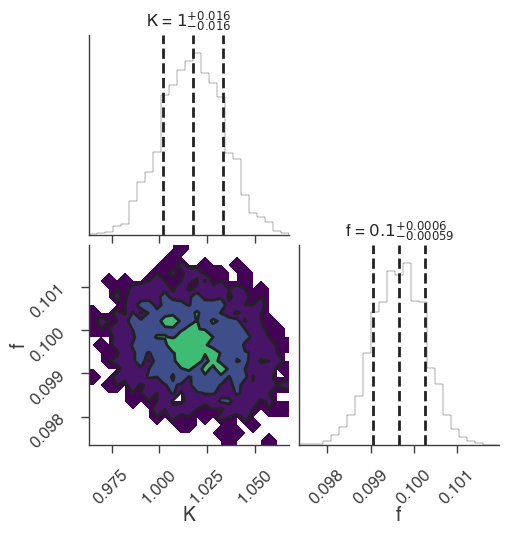

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()